Цифровая (относительная,
нормированная) частота. Формально такая частота определяется как
отношение реальной частоты к частоте дискретизации:
$f_0 = F_0/F_д,$ где $F_д = 1/T$ - частота дискретизации,
T – интервал между отчетами сигнала.
Значение  $1/F_0$ точности
соответствует числу точек на период для гармонического сигнала.

#**Упражнения 1-2. Демонстрация теоремы Котельникова.**

100


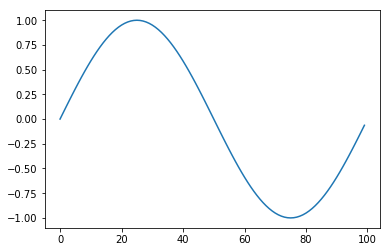

In [13]:
import numpy as np
import math 
import matplotlib.pyplot as plt

#число периодов на отрезке
P1 =1
P2 = 990
#количество точек на графике
N = 100
k1 = P1/N
k2 = P2/N
#пустые массивы значений
X = np.array([]) 
Y = np.array([])
Z = np.array([])
w1, w2 = 1, 1 #частоты сигналов

#создание двух гармонических сигналов
for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k1))
    Y = np.append(Y, math.sin(2*math.pi*w2*t*k2))
print(len(X))    
plt.plot(X)
#plt.subplot(122)
#plt.plot(Y)
#plt.plot(Y*Y)
#plt.plot(X+Y)
plt.show()

#**Упражнение 3. Спектры синусоидального сигнала**
Обычно рассматривают амплитудный, фазовый и
энергетический спектры. Мы остановимся на первом и последнем. Энергетический получается возведением в квадрат амплитудного. В случе цифровых сигналов, спектр получают, используя дискретное преобразование
Фурье (или оптимизированный алгоритм быстрого преобразования Фурье).

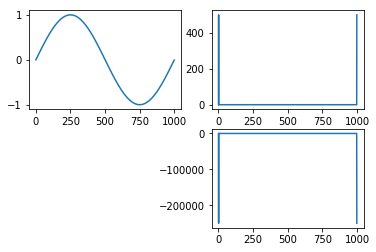

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 1
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
w1, w2 = 1, 1 #частоты сигналов

#создание двух гармонического сигнала
for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))

S = np.fft.fft(X)

plt.subplot(221)
plt.plot(X)
plt.subplot(222)
plt.plot(abs(S))
plt.subplot(224)
plt.plot((S)**2)
plt.show()

#**Упражнение 4. Импульсная и частотная характеристики цифровых фильтров.**
Под цифровым фильтром мы будет понимать дискретную систему с постоянными параметрами, причем ограничимся линейными системами. В таком случае система будет описываться уравнением
$y(n) = -\sum_{k=1}^N a(k)y(n-k)+\sum_{k=0}^M b(k)x(n-k)$

Где x (n) – отсчеты входного сигнала,

y(n)- отсчеты сигнала на выходе системы,

a(k), b(k) – коэффициенты фильтра,

N и M+1 – количество параметров a(k), b(k) соответственно. 

Максимальное число из N и M называется порядком фильтра.

Использование функции **scipy.signal.iirdesign**:

Passband and stopband edge frequencies. For digital filters, these are in the same units as fs. By default, fs is 2 half-cycles/sample, so these are normalized from 0 to 1, where 1 is the Nyquist frequency. For example:

Lowpass: wp = 0.2, ws = 0.3
Highpass: wp = 0.3, ws = 0.2
Bandpass: wp = [0.2, 0.5], ws = [0.1, 0.6]
Bandstop: wp = [0.1, 0.6], ws = [0.2, 0.5]

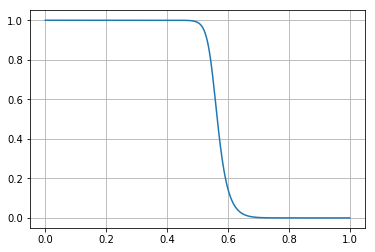

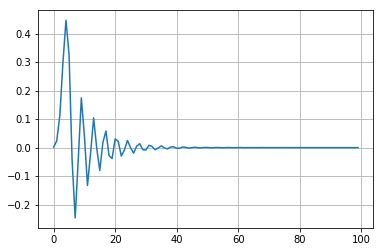

C:\Users\ipiga\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


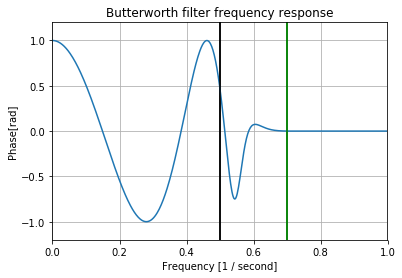

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
#частота пропускания и частота заграждения
wp, ws = 0.5, 0.7
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a) #вычисление частотной характеристики 

w=w/3.14
plt.plot(w, (abs(h)))
plt.grid(which='both', axis='both')
#plt.plot(w, abs(h))
#plt.plot(w,abs(h))
plt.show()

imp = np.array([])
delta = np.zeros(100)
delta[0] = 1
imp = signal.lfilter(b, a, delta)
plt.plot(imp)
plt.grid(which='both', axis='both')
plt.show()

plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(ws, color='green') # cutoff frequency
plt.axvline(wp, color='black')
#plt.show()

plt.plot(w, (h))
plt.grid(which='both', axis='both')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Phase[rad]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(ws, color='green') # cutoff frequency
plt.axvline(wp, color='black')
plt.show()

**Упражнение 5. Сумма и разность отсчетов как цифровые фильтры 
Генерируем синусоидальный сигнал
Для сумматора создаем массив с 9 нулями в начале.**

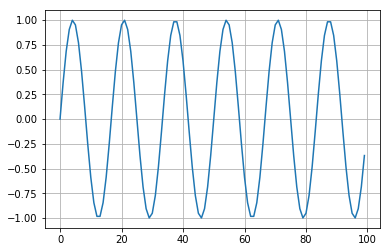

109


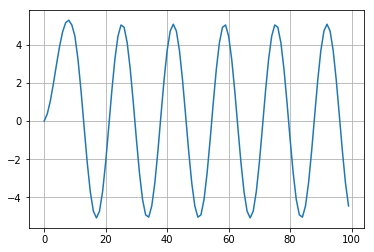

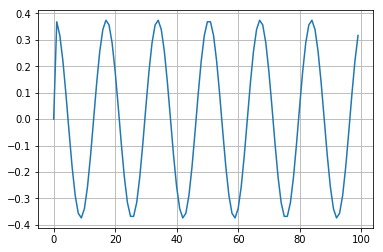

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

P = 6
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.zeros(9)
D = np.array([])
w1 = 1

for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))
     
plt.plot(X[9:])
plt.grid(which='both', axis='both')
plt.show()
print(len(X))
for i in range(len(X)-9):
    S = np.append(S, sum(X[i:i+10]))
plt.plot(S)
plt.grid(which='both', axis='both')
plt.show()

    
for i in range(len(X)-9):
    D = np.append(D,X[i+9]-X[i+8])
plt.plot(D)
plt.grid(which='both', axis='both')
plt.show()


**Упражнение 5. Сумма и разность отсчетов как цифровые фильтры.** 

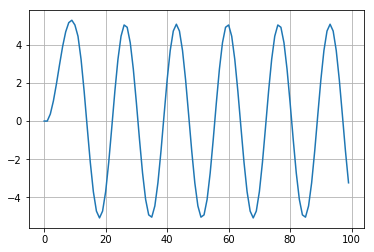

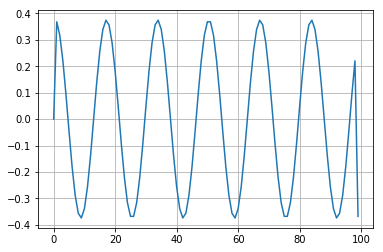

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

P = 6
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array([])
S = np.array([])
D = np.array([])
w1 = 1

for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))
#print(X)

for i in range(len(X)):
    if (i < 10):
        S = np.append(S, sum(X[1:i]))
    else:
        S = np.append(S, sum(X[i-10:i]))

plt.plot(S)
plt.grid(which='both', axis='both')
plt.show()

for i in range(len(X)):
    if (i > 1 and i < 99):
        D = np.append(D, X[i] - X[i-1])
    else:
        D = np.append(D, X[i])

plt.plot(D)
plt.grid(which='both', axis='both')
plt.show()

**Упражнение 6. Сравнение селективности КИХ и БИХ фильтров.**

9


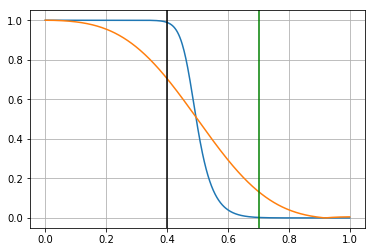

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 4.5
#количество точек на графике
N = 10000
k = P/N
#пустые массивы значений
# X = np.array(0) 
S = np.array([])
#частота пропускания и частота заграждения
wp, ws = 0.4, 0.7
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a) #вычисление частотной характеристики 


w=w/3.14
plt.plot(w,abs(h))
# plt.plot(w, abs(h))
# plt.plot(w,abs(h))
print(len(b))
b1 = signal.firwin(len(b), 0.5, window='hamming')
w1, h1 = signal.freqz(b1)
w1=w1/3.14
plt.plot(w1,abs(h1))



plt.grid(which='both', axis='both')
plt.axvline(ws, color='green') # cutoff frequency
plt.axvline(wp, color='black')
plt.show()



## Упражнение 7 
### Пример неустойчивого фильтра. Устранение неустойчивости заменой одного фильтра каскадом из фильтров 2 порядка.


C:\Users\ipiga\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


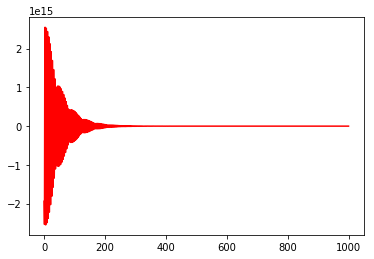

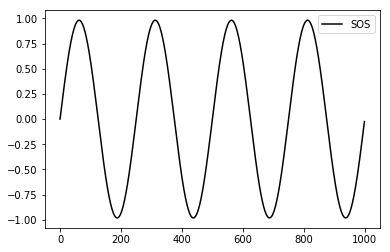

In [8]:
import matplotlib.pyplot as plt
from scipy import signal
import math
import numpy as np
wp, ws = 0.4, 0.6
wn = (wp+ws)/2
gpass, gstop = 0.1, 10.0
# b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='cheby1', output='ba')
# sos = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='cheby1', output='sos')
# b, a = signal.cheby1(50, gpass, gstop, wn, output='ba')
# sos = signal.cheby1(50, gpass, gstop, wn, output='sos')
b, a = signal.cheby1(N=36, rp=0.1, Wn=wn, btype='low', analog=False, output='ba') 
sos  = signal.cheby1(N=36, rp=0.1, Wn=wn, btype='low', analog=False, output='sos')
P = 4
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X = []
w1 = 1 #частоты сигналов

for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))

y_tf = signal.filtfilt(b, a, X)
y_sos = signal.sosfiltfilt(sos, X)
plt.plot(y_tf, 'r', label='TF')
plt.show()

plt.plot(y_sos, 'k', label='SOS')
plt.legend(loc='best')
plt.show()



## Упражнение 8
### Пример получения неказуальной системы при занулении отчетов спектра.

1024


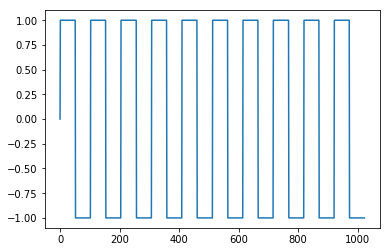

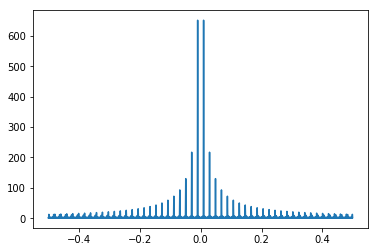

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 10
#количество точек на графике
N = 1024
k = P/N
#пустые массивы значений
XX = np.array([]) 
w1 = 1
#создание двух гармонического сигнала
for t in range(N):
    
    XX = np.append(XX, math.sin(2*math.pi*w1*t*k))
print(len(XX))   
meander = np.sign(XX)
plt.plot(meander)
plt.show()

S = np.fft.fft(meander)
freq = np.fft.fftfreq(N)
plt.plot(freq, abs(S))
plt.show()

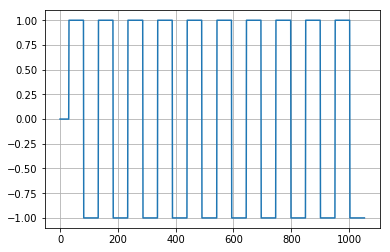

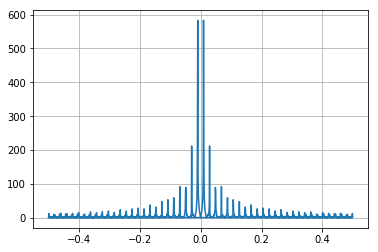

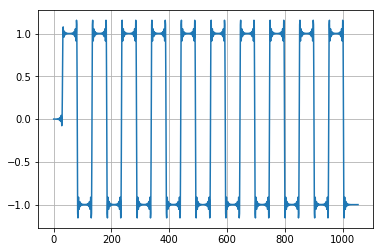

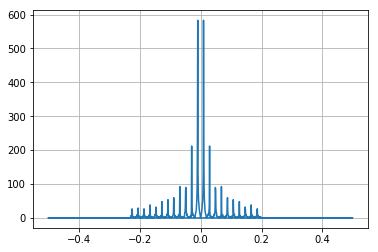

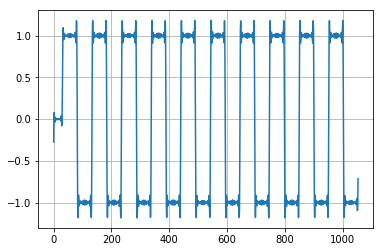

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке 
P = 10 
#количество точек на графике 
N = 1024 
k = P/N 
#пустые массивы значений 
X = np.zeros(30) 
w1 = 1 #частота сигнала 

#создание гармонического сигнала 
for t in range(N): 
    X = np.append(X,  math.sin(2*math.pi*w1*t*k)) 
    
meandr = np.sign(X) 

plt.plot(meandr) 
plt.grid() 
plt.show() 

S = np.fft.fft(meandr) 
freq = np.fft.fftfreq(N+30) 

plt.plot(freq, abs(S)) 
plt.grid() 
plt.show()

#частота пропускания и частота заграждения
wp, ws = 0.4, 0.7
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
y_tf = signal.filtfilt(b, a, meandr)
plt.plot(y_tf) 
plt.grid(True)
plt.show()

rspectr = S
rspectr[512-300:512+300] = 0
plt.plot(freq, abs(rspectr))
plt.grid(True)
plt.show()

rmeandr = np.fft.ifft(rspectr)
plt.plot(rmeandr)
plt.grid(True)
plt.show()

**Упражнение 9. Фильтрация меандра.**

1024


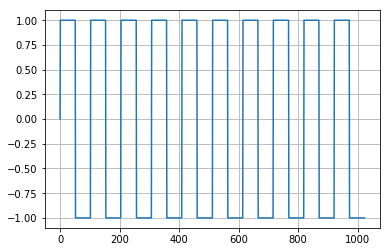

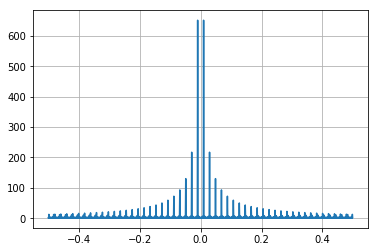

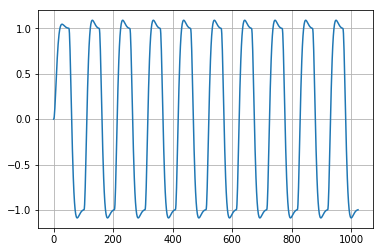

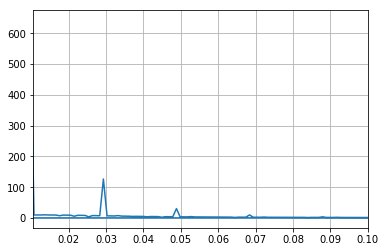

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 10
#количество точек на графике
N = 1024
k = P/N
#пустые массивы значений
XX = np.array([]) 
w1 = 1
#создание двух гармонического сигнала
for t in range(N):
    
    XX = np.append(XX, math.sin(2*math.pi*w1*t*k))
print(len(XX))   
meander = np.sign(XX)
plt.plot(meander)
plt.grid(True)
plt.show()

S = np.fft.fft(meander)
freq = np.fft.fftfreq(N)
plt.plot(freq, abs(S))
plt.grid(True)
plt.show()

#частота пропускания и частота заграждения
wp, ws = 0.02, 0.7
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
filt = signal.lfilter(b, a, meander)
plt.plot(filt) 
plt.grid(True) 
plt.show()

qw = np.fft.fft(filt)
fr = np.fft.fftfreq(N)
plt.plot((fr), abs(qw))
plt.xlim((0.0105,0.1))
plt.grid(True)
plt.show()

**Упражнение 10. Дополнение нулями последовательности.**

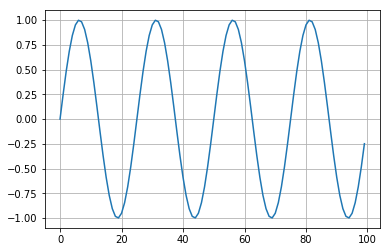

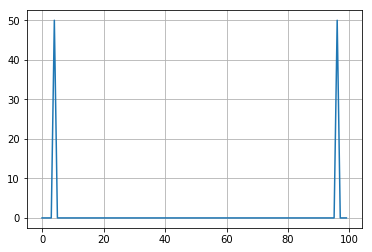

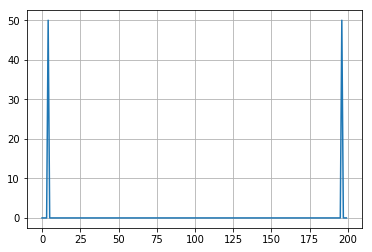

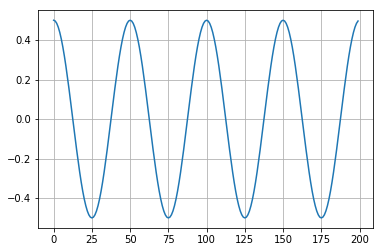

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt

P = 4
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array([])

Z = np.zeros(200)
w1 = 1

for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))
#print(X)
plt.plot(X) 
plt.grid() 
plt.show() 

S = np.fft.fft(X) 
#freq = np.fft.fftfreq(N) 

plt.plot(abs(S)) 
plt.grid() 
plt.show()
#print(S)
for i in range(200):
    if (i < 45):
        Z[i] =  abs(S[i])
    if (55 < i < 99):
        Z[i+100] = abs(S[i])
rmeandr = np.fft.ifft(Z)

plt.plot(Z) 
plt.grid() 
plt.show()

plt.plot(rmeandr) 
plt.grid() 
plt.show()

